# Step 2 - Selezione dei tagli per selezionare il segnale
* Il nostro obiettivo è quello di ricercare il canale raro 
$$q\bar q \rightarrow g \rightarrow t\bar t \rightarrow Wb+Wb \rightarrow l\nu b + l\nu b$$
* Al fine di poter ricercare il canale di interesse nei dati procediamo con la selezione del segnale nelle simulazioni MC
    + consideriamo solo i casi in cui ho almeno 2 muoni, altrimenti posso già scartare tutto
        - I muoni devono essere passing probes (entrambi almeno) col cut deciso nello step 1 così da avere efficienza del 90%: 
        $$dz <0.014 \qquad dB<0.007 \qquad isoDeposits < 9$$ 
    + Dobbiamo considerare la selezione sui muoni ricavata dallo step 1, fatta col tag&probe
    + Dobbiamo riuscire a capire quanto le variabili che abbiamo siano discriminanti per il fondo. Per farlo abbiamo utilizzato:
        - Numero di jets
        - muon_dz
        - muon_dB
        - jets energy
        - muon pt
        - jets pt
        - met pt

In [1]:
import ROOT
import particle as pt
import funx as fx
import numpy as np

filett = ROOT.TFile("../datas/TTDilep.root","OPEN")
tttr = filett.trees.events

fileDY = ROOT.TFile("../datas/DYJets.root","OPEN")
dytr = fileDY.trees.events

Welcome to JupyROOT 6.26/04


Warning in <TFile::Append>: Replacing existing TH1: Jet_size (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Jet_size (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Jet_e (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Jet_e (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Jet_pt (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Jet_pt (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: met (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: met (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: mu_dz (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: mu_dz (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: mu_dB (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: mu_dB (Potential memory leak).


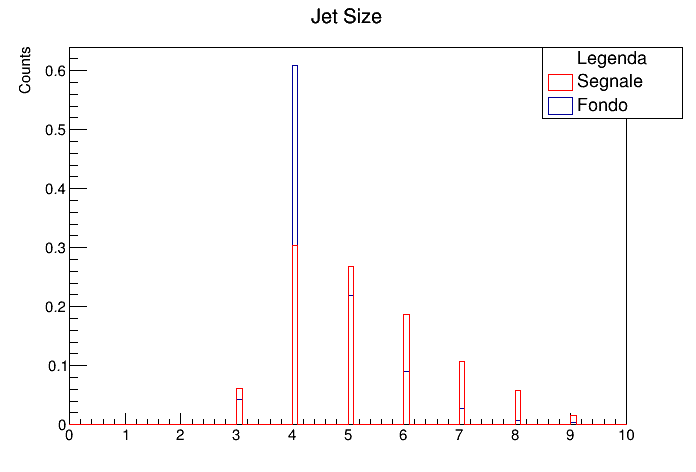

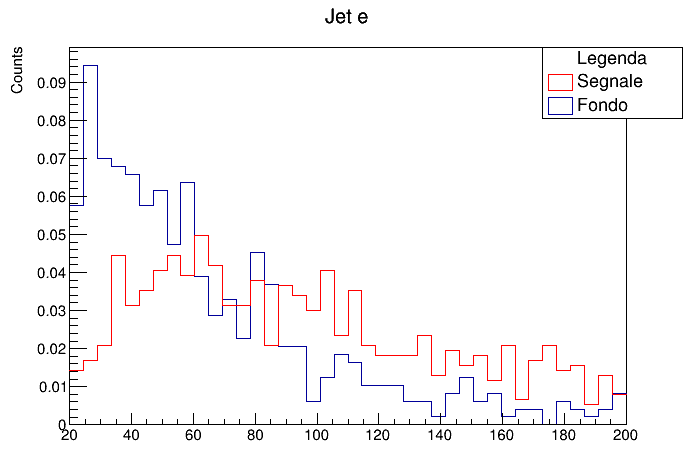

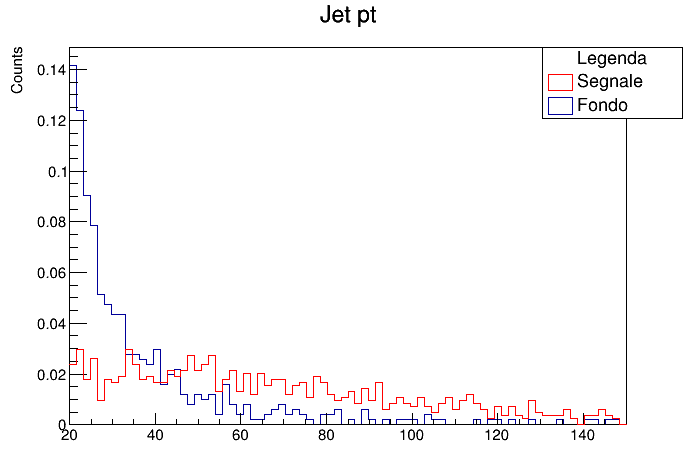

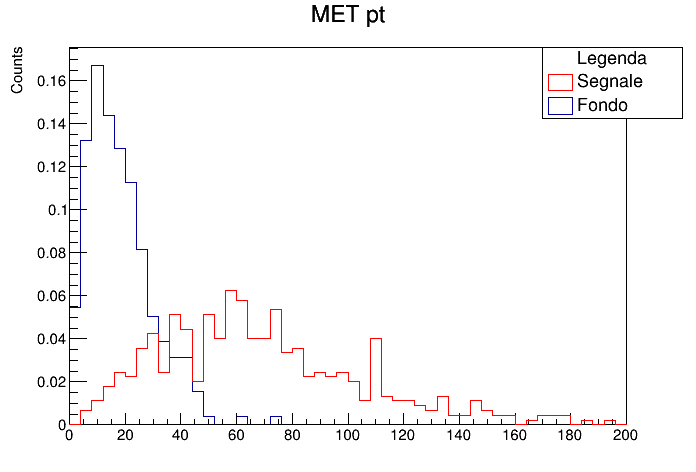

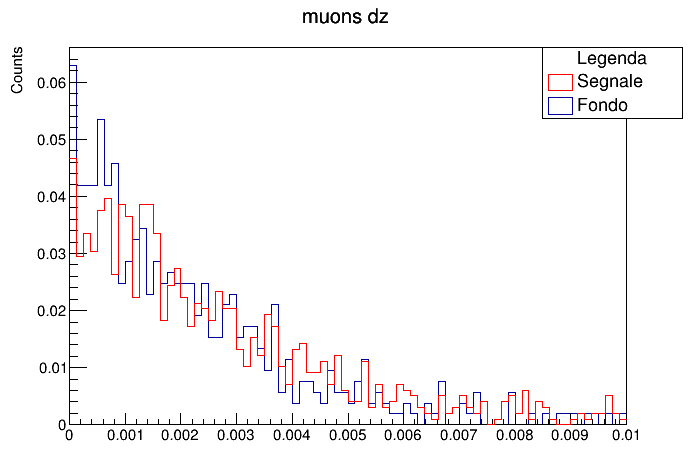

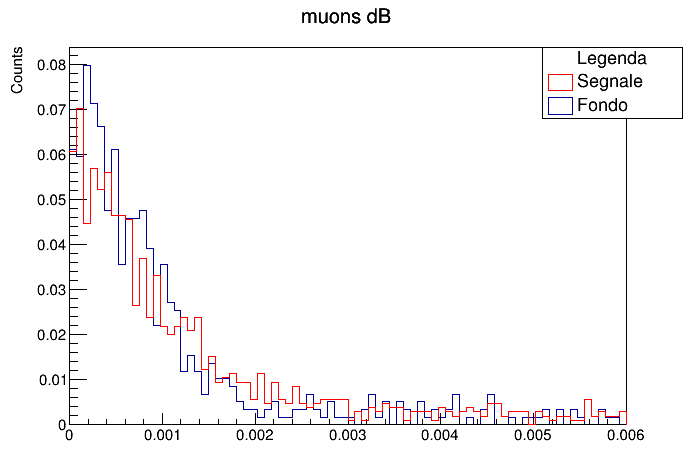

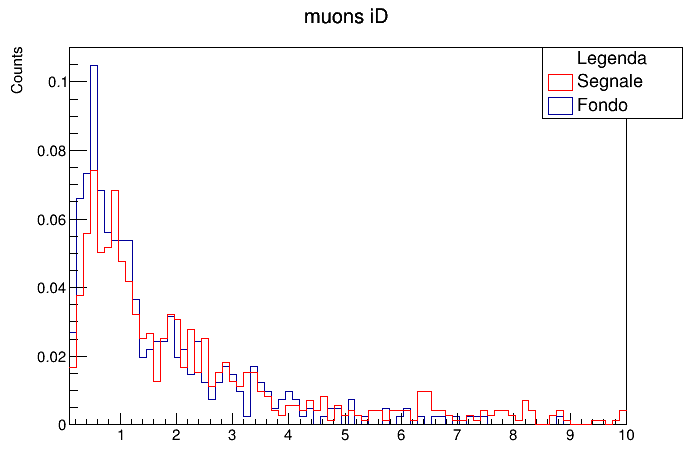

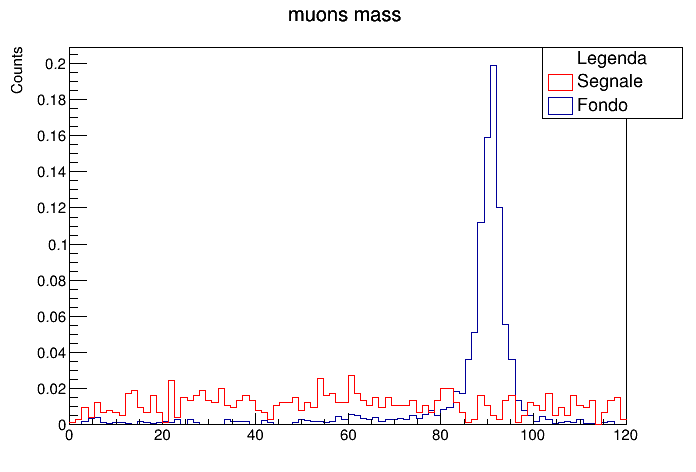

In [5]:
#jets
h_tt_jsz=ROOT.TH1F("Jet_size", "Jet Size", 100, 0 , 10)
h_dy_jsz=ROOT.TH1F("Jet_size", "Jet Size", 100, 0 , 10)
h_tt_je=ROOT.TH1F("Jet_e", "Jet e", 40, 20 , 200)
h_dy_je=ROOT.TH1F("Jet_e", "Jet e", 40, 20 , 200)
h_tt_jpt=ROOT.TH1F("Jet_pt", "Jet pt", 80, 20 , 150)
h_dy_jpt=ROOT.TH1F("Jet_pt", "Jet pt", 80, 20 , 150)
#met
h_tt_met=ROOT.TH1F("met", "MET pt", 50, 0 , 200)
h_dy_met=ROOT.TH1F("met", "MET pt", 50, 0 , 200)
#muoni
h_dz_dy=ROOT.TH1F("mu_dz", "muons dz", 80, 0, 0.01)
h_dz_tt=ROOT.TH1F("mu_dz", "muons dz", 80, 0, 0.01)
h_dB_dy=ROOT.TH1F("mu_dB", "muons dB", 80, 0, 0.006)
h_dB_tt=ROOT.TH1F("mu_dB", "muons dB", 80, 0, 0.006)
h_iD_dy=ROOT.TH1F("mu_iD", "muons iD", 80, 0.1, 10)
h_iD_tt=ROOT.TH1F("mu_iD", "muons iD", 80, 0.1, 10)
h_m_dy=ROOT.TH1F("two_mu_mass", "muons mass", 90, 0, 120)
h_m_tt=ROOT.TH1F("two_mu_mass", "muons mass", 90, 0, 120)

arr = [[h_tt_jsz, h_dy_jsz],[h_tt_je,h_dy_je], [h_tt_jpt,h_dy_jpt], [h_tt_met,h_dy_met], [h_dz_tt,h_dz_dy],[h_dB_tt,h_dB_dy], [h_iD_tt,h_iD_dy],[h_m_tt,h_m_dy]]

fx.cut_find_histos(tttr,h_tt_jsz,h_tt_met,h_tt_je,h_tt_jpt,h_dz_tt,h_dB_tt,h_m_tt,h_iD_tt)
fx.cut_find_histos(dytr,h_dy_jsz,h_dy_met,h_dy_je,h_dy_jpt,h_dz_dy,h_dB_dy,h_m_dy,h_iD_dy)

c=list(np.zeros(8))
leg=list(np.zeros(8))
h_tts=[]
h_dys=[]
for i in arr:
    h_tts.append(i[0])
    h_dys.append(i[1])
for i in range(8):
    c[i]=ROOT.TCanvas()
    c[i].Draw()
    h_tts[i].Scale(1/h_tts[i].Integral())
    h_dys[i].Scale(1/h_dys[i].Integral())
    h_dys[i].SetStats(0)
    
    h_dys[i].GetXaxis().SetTitle()
    h_dys[i].GetYaxis().SetTitle("Counts")
    
    h_dys[i].Draw("hist")
    h_tts[i].SetLineColor(ROOT.kRed)
    h_tts[i].Draw("SAME,hist")
    
    leg[i]= ROOT.TLegend(0.98,0.9,0.78,0.75) #0.4,0.7,0.6,0.9
    leg[i].SetHeader("Legenda", "C")                         
    leg[i].AddEntry(h_tts[i], "Segnale","f")            
    leg[i].AddEntry(h_dys[i], "Fondo","f")
    leg[i].Draw()

Per evidenziare le caratteristiche importanti facciamo un blocco di codice che grafichi solo quelle

In [ ]:
#cut finder solo delle caratteristiche utili alla classificazione
#jets
h_tt_je=ROOT.TH1F("Jet_e", "Jet e", 40, 20 , 200)
h_dy_je=ROOT.TH1F("Jet_e", "Jet e", 40, 20 , 200)
h_tt_jpt=ROOT.TH1F("Jet_pt", "Jet pt", 80, 20 , 150)
h_dy_jpt=ROOT.TH1F("Jet_pt", "Jet pt", 80, 20 , 150)
#met
h_tt_met=ROOT.TH1F("met", "MET pt", 50, 0 , 200)
h_dy_met=ROOT.TH1F("met", "MET pt", 50, 0 , 200)
#muoni
h_m_dy=ROOT.TH1F("two_mu_mass", "mu_mass", 90, 0, 120)
h_m_tt=ROOT.TH1F("two_mu_mass", "mu_mass", 90, 0, 120)

arr = [[h_tt_je,h_dy_je], [h_tt_jpt,h_dy_jpt], [h_tt_met,h_dy_met],[h_m_tt,h_m_dy]]

fx.cut_find_small(tttr,h_tt_met,h_tt_je,h_tt_jpt,h_m_tt)
fx.cut_find_small(dytr,h_dy_met,h_dy_je,h_dy_jpt,h_m_dy)

c=list(np.zeros(4))
h_tts=[]
h_dys=[]
for i in arr:
    h_tts.append(i[0])
    h_dys.append(i[1])
for i in range(4):
    c[i]=ROOT.TCanvas()
    c[i].Draw()
    h_tts[i].Scale(1/h_tts[i].Integral())
    h_dys[i].Scale(1/h_dys[i].Integral())
    h_dys[i].Draw("hist")
    h_tts[i].SetLineColor(ROOT.kRed)
    h_tts[i].Draw("SAME,hist")

## Fitting
Iniziamo una serie di fit così da poter stimare la bontà di un taglio 

signal efficiency cut: 83.5661744358117
 FCN=52.0931 FROM MIGRAD    STATUS=CONVERGED      91 CALLS          92 TOTAL
                     EDM=3.13523e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           7.41558e+00   8.81671e-01   1.24069e-03  -7.04891e-04
   2  p1           1.22661e+01   8.29740e-01   1.16833e-03  -6.30830e-04
 FCN=66.0334 FROM MIGRAD    STATUS=CONVERGED      38 CALLS          39 TOTAL
                     EDM=1.87483e-15    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.58491e-02   1.22438e-03   3.14864e-04   1.57896e-04
   2  p1          -1.70025e-04   1.16869e-05   1.20000e-05   1.67017e-02


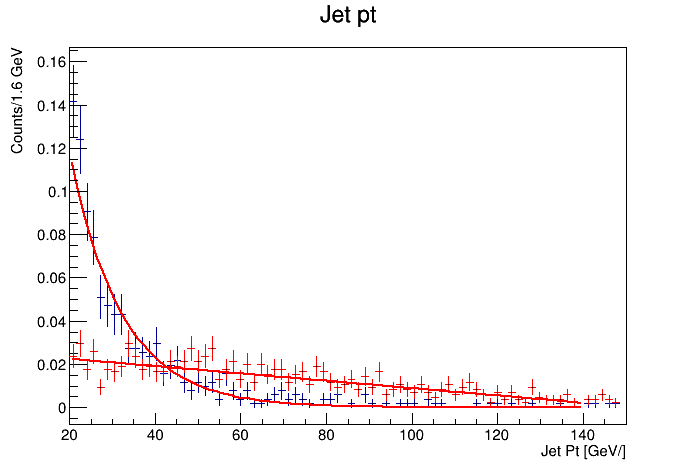

In [3]:
f_dy_jpt = ROOT.TF1("exp", "[0]/[1]*exp(-x/[1])",20,140)
f_tt_jpt = ROOT.TF1("retta", "[0]+[1]*x",20,140)
c1=ROOT.TCanvas()
c1.Draw()

f_dy_jpt.SetParameters(1,4)
h_dy_jpt.Fit(f_dy_jpt,"SR")
h_dy_jpt.Draw()
h_tt_jpt.Draw("SAME")
f_tt_jpt.SetParameters(1,-4)
h_tt_jpt.Fit(f_tt_jpt,"SR")

h_dy_jpt.GetXaxis().SetTitle("Jet Pt [GeV/]")
h_dy_jpt.GetYaxis().SetTitle("Counts/1.6 GeV")

bb= f_dy_jpt.Integral(45,140) #integrali nel cut >45
ss=f_tt_jpt.Integral(45,140)
bg_eff = bb/(bb+ss) *100
sig_eff = ss/(bb+ss)*100
print("signal efficiency cut:" ,sig_eff)

signal efficiency cut: 91.65571429003113
 FCN=15.2265 FROM MIGRAD    STATUS=CONVERGED     173 CALLS         174 TOTAL
                     EDM=6.93606e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.49059e+01   1.14005e+00   1.19703e-03  -4.62563e-04
   2  p1          -6.16103e+00   4.04601e-01   5.40915e-04  -3.64333e-04
   3  p2           8.50636e-01   1.27705e-01   1.07640e-04  -2.31163e-03
 FCN=54.596 FROM MIGRAD    STATUS=CONVERGED     214 CALLS         215 TOTAL
                     EDM=1.18727e-06    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           6.18246e+01   2.18830e+00   6.05601e-03  -1.10541e-04
   2  p1          -1.26333e+01   5.74570e-01   1.67036e-03  -3.299

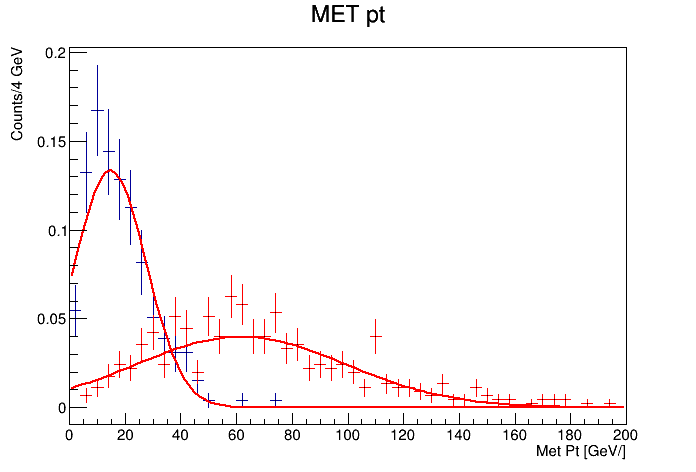

In [4]:
f_dy_metpt = ROOT.TF1("gauss","[2]*1/([1]*TMath::Sqrt(2*TMath::Pi()))*exp(-(x-[0])*(x-[0])/(TMath::Sqrt(2)*[1]*[1]))",0,200)
f_tt_metpt = ROOT.TF1("gauss","[2]*1/([1]*TMath::Sqrt(2*TMath::Pi()))*exp(-(x-[0])*(x-[0])/(TMath::Sqrt(2)*[1]*[1]))",0,200)
c2=ROOT.TCanvas()
c2.Draw()

f_dy_metpt.SetParameters(8,100,0.1)
h_dy_met.Fit(f_dy_metpt,"SR")
h_dy_met.Draw()
h_tt_met.Draw("SAME")
f_tt_metpt.SetParameters(50,3000,1)
h_tt_met.Fit(f_tt_metpt,"SR")
h_dy_met.GetXaxis().SetTitle("Met Pt [GeV/c]")
h_dy_met.GetYaxis().SetTitle("Counts/4 GeV")

bb= f_dy_metpt.Integral(35,140) #integrali nel cut >35
ss=f_tt_metpt.Integral(35,140)
bg_eff = bb/(bb+ss) *100
sig_eff = ss/(bb+ss)*100
print("signal efficiency cut:" ,sig_eff)

signal efficiency cut: 61.64651921781403
 FCN=48.5859 FROM MIGRAD    STATUS=CALL LIMIT   1351 CALLS        1352 TOTAL
                     EDM=0.00445095    STRATEGY= 1      ERR MATRIX NOT POS-DEF
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           8.59811e+02   7.68026e+01   2.00178e+00  -5.63557e-02
   2  p1           3.69944e+01   1.58537e+00   2.94007e-02   1.84121e+00
   3  p2           1.94633e-05   1.63945e-05  -4.94340e-07  -1.17918e+05
 FCN=66.6354 FROM MIGRAD    STATUS=CONVERGED     193 CALLS         194 TOTAL
                     EDM=8.42247e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           7.36107e+01   4.91787e+00   7.35973e-03  -4.48104e-05
   2  p1          -1.83631e+01   1.00715e+00   1.85789e-03   1.989

Warning in <Fit>: Abnormal termination of minimization.


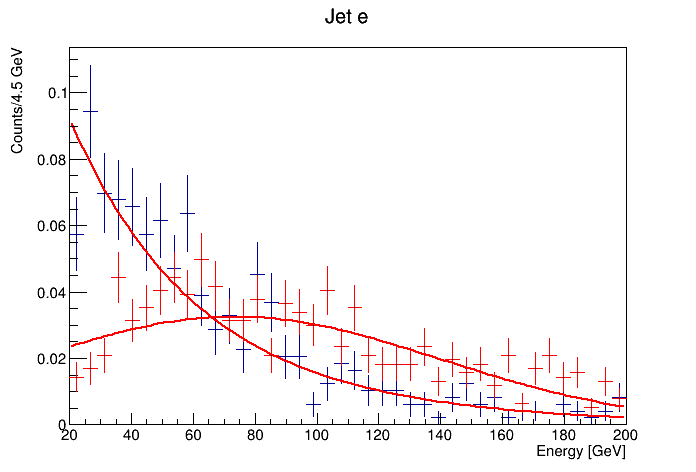

In [8]:
f_dy_je = ROOT.TF1("gauss","[2]*1/([1]*TMath::Sqrt(2*TMath::Pi()))*exp(-(x-[0])*(x-[0])/(TMath::Sqrt(2)*[1]*[1]))",0,200)
f_tt_je = ROOT.TF1("gauss","[2]*1/([1]*TMath::Sqrt(2*TMath::Pi()))*exp(-(x-[0])*(x-[0])/(TMath::Sqrt(2)*[1]*[1]))",0,200)
c3=ROOT.TCanvas()
c3.Draw()

f_dy_je.SetParameters(8,100,0.1)
h_dy_je.Fit(f_dy_je,"SR")
h_dy_je.Draw()
h_tt_je.Draw("SAME")
f_tt_je.SetParameters(50,3000,1)
h_tt_je.Fit(f_tt_je,"SR")

h_dy_je.GetXaxis().SetTitle("Energy [GeV]")
h_dy_je.GetYaxis().SetTitle("Counts/4.5 GeV")

bb= f_dy_je.Integral(50,250) #integrali nel cut >60
ss=f_tt_je.Integral(50,250)
bg_eff = bb/(bb+ss) *100
sig_eff = ss/(bb+ss)*100
print("signal efficiency cut:" ,sig_eff)